# Exercise Sheet 1 – Deep Learning with PyTorch

 * Deep Learning for Computer Vision – Winter Term 2022/23
 * Organizers: Anwai Archit, Laura Hansel, Michaela Vystrcilova, Constantin Pape
 * Tutors: Anwai Archit, Mai Elshazly, Andreas Schneider, Fabio Seel, Shashwat Sridhar
 * Due Date: Monday, Nov 7, before 14:00

# IMPORTANT SUBMISSION INSTRUCTIONS

You should work on the exercises in groups of 2-3. It is on you how you collaborate, but please make sure that everyone contributes equally and also that you understand all the solutions.
You will be asked to present your group's solution in the tutorials and you should be well prepared to present any part of it.

- When you've completed the exercise, download the notebook and rename it to ```<surname1>_<surname2>_<surname3>.ipynb```.
- Only submit the Jupyter Notebook (ipynb file). No other file is required. Upload it on `Stud.IP` -> `Deep Learning for Computer Vision` -> `Files` -> `Submission of Homework 1`.
- Make only one submission of the exercise per group.
- The deadline is strict.
- In addition to the submissions, every member of your group should be prepared to present the exercise in the tutorials.

Implementation
- Do not change the cells which are marked as "DO NOT CHANGE", similarly write your solution to the marked cells.

## How to work on the exercise?

You will need access to a machine with a GPU to properly work on the exercises. We recommend using [Kaggle](https://www.kaggle.com/), which offers convenient access to a GPU and has all the dependencies that we need preinstalled ([here](https://gist.github.com/anwai98/444d3ff11c1365f2c610579d5df0830b) are some initial steps to work with Kaggle Notebooks). You can load this notebook on kaggle via `File` -> `Import Noteboook` -> `Browse and  Import`.

# Introduction

In this task you will get to know the basic tools used by the machine learning community.
Later, we will build a logistic regression model with PyTorch and perform training and prediction on the MNIST dataset.

## Tutorials

Some python libraries are required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:

*   [PyTorch Tutorial](https://pytorch.org/tutorials/)
*   [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html)


## Imports

Jupyter Notebook provides the possibility of using libraries, functions and variables globally. This means, once you import the libraries, functions, etc. you won't have to import them again in the next cell. However, if for any reason you end the session (crash, timeout, etc.), then you'll have to run this cell to have your libraries imported again. So, let's go ahead and import whatever we need in this homework assignment.

In [426]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import pathlib
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import sampler
from sklearn.metrics import confusion_matrix

## System checks

Perform some rudimentary system checks. Do we have a CUDA-capable device? Multiple? Is CuDNN active (huge speedups for some networks)?

In [427]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count()

(True, True, 1)

If you see now that now that there is no CUDA-capable device available, you have to activate the GPU.

Click the top-right corner menu `|<` -> `Settings` -> `Accelerator` -> Select `GPU` as Hardware accelerator.

![image.png](attachment:12a8892f-754f-4514-afe4-cb27b8b982f2.png)

Now check the availability again (after re-running the imports)

In [428]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count(), torch.cuda.current_device()

(True, True, 1, 0)

Choose your device for computation. CPU or one of your CUDA devices?

In [429]:
# DO NOT CHANGE
use_cuda = True
use_cuda = False if not use_cuda else torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else 'cpu')
torch.cuda.get_device_name(device) if use_cuda else 'cpu'
print('Using device', device)

Using device cuda:0


# PyTorch: Getting to know Tensors

PyTorch is a library for deep learning on arbitray datasets, including irregular input data such as graphs, point clouds and manifolds. 

In this short tutorial we will explore some of its features to handle data in tensors. 
If you want, you can look into more [detailed PyTorch tutorials](https://pytorch.org/tutorials/) online.

In [430]:
# create a numpy array
numpyarray = np.arange(10).reshape(2, 5)
# convert to pytorch tensor
a = torch.from_numpy(numpyarray)

Let us find out what the properties of this tensor 'a' are.

In [431]:
# TODO print the tensor
print(a)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [432]:
# TODO print its type
type(a)

torch.Tensor

In [433]:
# TODO print its shape
a.shape

torch.Size([2, 5])

In [434]:
# TODO print its size
a.size()

torch.Size([2, 5])

In [435]:
# TODO create a new numpy array out of the tensor and print its size
np_arr = a.cpu().detach().numpy()
np_arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

Let's create some new tensors.

In [436]:
# TODO create a tensor of shape (2,5) filled with ones of type int and print it


In [437]:
# TODO create a tensor of shape (3,4) filled with zeros and print it


In [438]:
# TODO transpose the tensor 'a'


Now change a value in the numpy array. Does the corresponding tensor change?

In [439]:
# TODO change value in numpy array and inspect the tensor a


**TODO Your answer here** - 

Does it work the other way round as well?

**TODO Your answer here** - 

Now we want to make use of the different devices available, namely cpu and gpu. 

In [440]:
# TODO move 'a' to the gpu


If you change a value in the tensor 'a' now, does the corresponding value in the tensor on the GPU change as well?

**TODO Your answer here** -

# Deep Learning with Pytorch

The process of training and evaluating a deep learning model begins with **data loading**.
A dataset needs to be chosen on which the model should be trained.
This data might need some preprocessing (like resizing or normalizing) of images.
Splitting of the data in different sets is necessary. We need a set to train on, a set to validate the training progress and a set to test the model after training.

The next step is to **specify the model and its optimizer**, as well as the loss function.
An important hyperparameter is the learning rate which influences how big the changes of the parameters should be after calculating the loss.

The **model fitting** is split into training and evaluation.
In the training process the model does a forward pass which means the data is presented to the model and the model outputs a prediction.
The loss compares the prediction with the ground truth.
In the backward pass the gradient with regard to the parameter is calculated and the parameter are updated by the gradient step.
In the evaluation process the loss is computed on the entire validation set.
This is done to see how well the model operates on data for which the params were not optimized before in order to avoid overfitting.
The model fitting process is repeated for `N` epochs which is another hyperparameter that needs to be chosen carefully.

After the training we evaluate the final model on the test set.

We'll go through the individual steps in the course of this notebook.


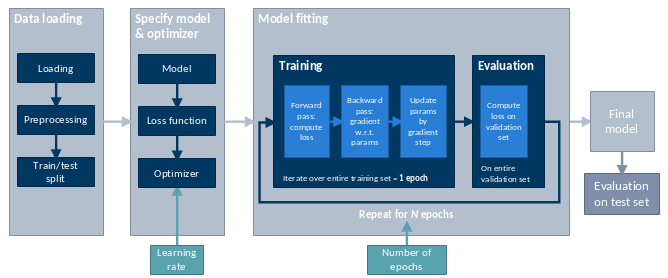

## Data Loading

### Loading the MNIST Dataset
This dataset contains handwritten digits, and it is widely used by the machine learning community. It's really useful that you get accustomed with this dataset, as you'll come across it later to learn other concepts. 

The first thing you should do when you begin to work with a data set that you have not used before is to play around with it to get a better understanding of its properties.

**Download** the train split of the MNIST dataset using torchvision dataset classes.

In [441]:
# DO NOT CHANGE
data_dir = pathlib.Path('data/')
mnist = datasets.MNIST(data_dir, download=True, train=True)

Let's check the first ten samples to see what they look like

In [442]:
X_sample, y_sample = mnist[0]
# TODO: display the label and the image
print(y_sample)
X_sample

5


Look at the types of X and y.

In [443]:
# TODO: display types
print(type(X_sample))
print(type(y_sample))

<class 'PIL.Image.Image'>
<class 'int'>


How many data points are there in the dataset?

In [444]:
# TODO: print out the length of the dataset
len(mnist)

60000

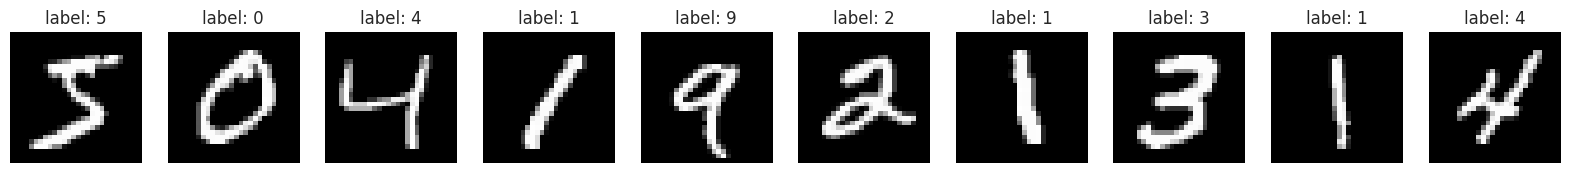

In [445]:
# DO NOT CHANGE
N = 10
fig, axes = plt.subplots(1, N, figsize=(2*N, 2))
X, y = mnist.data, mnist.targets
for ax, image, label in zip(axes.ravel(), X, y):
  ax.set_title("label: {}".format(label))
  ax.axis('off')
  ax.imshow(image.reshape(28,28), cmap='gray') # Remember, images are 28x28

The following plots show more information about the dataset:

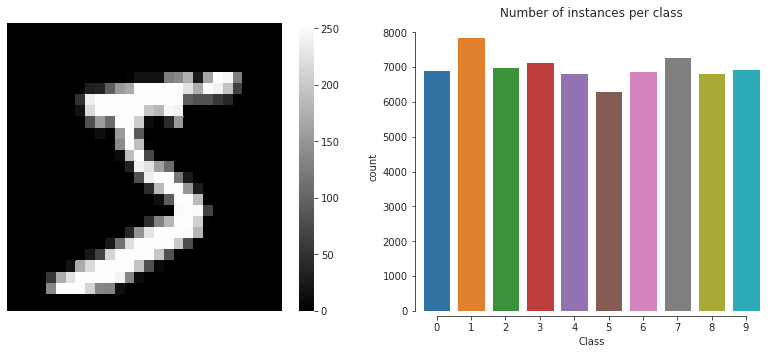


Now that you know what MNIST looks like, you can guess what the task for this dataset is: classifying handwritten digits.

### Preprocessing the Data

#### Transformation

We have seen above that the contents of the data set are of type [(PIL.Image.Image, Int)]. However, `pytorch` (the core library, not `torchvision`) is only equipped to work on Tensor objects. So we need to **transform** _PIL.Image.Image_ to _torch.Tensor_. Torchvision takes care of that for us. _transforms.ToTensor_ is a transformation operation that maps a _PIL.Image.Image_ to a torch tensor.

In [446]:
# DO NOT CHANGE
mnist = datasets.MNIST(data_dir, download=True, train=True, transform=transforms.ToTensor())

#### Normalization


Furthermore, we will **normalize** the data to zero-mean and unit-variance. _transforms.Normalize_ takes the mean and std-dev for each channel and rescales the data to zero-mean, unit-variance. 

See https://pytorch.org/vision/stable/transforms.html for more information.

We can combine multiple transformations via _transforms.Compose_.

So let's create a new dataset that we will be using for testing purposes with those transformations in-place.


In [447]:
# DO NOT CHANGE
tmp_dataloader = torch.utils.data.DataLoader(mnist, batch_size=len(mnist), shuffle=True)

In [448]:
def get_mean(data):
    sum_batches, batches = 0, 0
    for i, _ in data:
        sum_batches += torch.mean(i, dim = [0, 2, 3])
        batches += 1
    return(sum_batches / batches)


def get_std(data, mean):
    sum_batches, batches = 0, 0
    for i, _ in data:
        sum_batches += torch.mean(i ** 2, dim = [0, 2, 3])
        batches += 1
    return((sum_batches / batches - mean ** 2)**0.5) 

In [449]:
# TODO calculate the mean and standard deviation of MNIST train dataset
mean = get_mean(tmp_dataloader)
std = get_std(tmp_dataloader, mean)
print(mean, std)

tensor([0.1307]) tensor([0.3081])


In [450]:
# DO NOT CHANGE
mnist_transforms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean,), (std,))])

### Training, Validation and Test Sets

For the correct fitting of a neural network model we need three dataset components: one for training, one for validation in the training process, and the last one for testing the results of the training on unseen data. 

Note that you should not use the test set in any part of your training and model selection procedure. It should be only used for showing the final results.

We first need to **load** the datasets.
Above, we did that already to visualize the data and calculate normalization values.
Now we load them and **apply the normalization transform** in this process.

In [451]:
# TODO download the dataset for training and testing, with normalization transform
mnist_train = datasets.MNIST(data_dir, download=True, train=True, transform=mnist_transforms)
mnist_test = datasets.MNIST(data_dir, download=True, train=False, transform=mnist_transforms)

We need to **split** the train dataset in two sets, one for training and one for validation. 
While the training set needs to be quite large, the validation set can be relatively small.
Take 10 % of the dataset as validation set.
Assign samples *randomly* to the training and validation set, using a fixed seed to ensure reproducibility.

In [452]:
# TODO split the train dataset in mnist_train and mnist_val
train_size = int(0.9 * len(mnist_train))
val_size = len(mnist_train) - train_size
mnist_train, mnist_val = torch.utils.data.random_split(mnist_train, [train_size, val_size])

To load the data for model training, we need to define the **dataloaders**.
A dataloader represents a Python iterable over a dataset and draws mini batches with random samples.
Use the batch size as specified above.
Make sure we get shuffled samples in batches.

In [453]:
batch_size = 256

In [454]:
# TODO create dataloader for training, validation and test
train_dataloader = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
val_dataloader = torch.utils.data.DataLoader(mnist_val, batch_size=batch_size, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

Let's get a data point now to see what we're dealing with. 

For this, you might want to check out how python's iterator protocol works. It's simple and will give you an important insight into python: https://wiki.python.org/moin/Iterator.

In [455]:
# TODO display an element of the train_dataloader
itr = iter(train_dataloader)
iter_element = next(itr)
print(iter_element[0][0], iter_element[1][0])

tensor([[[-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241],
         [-0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241, -0.4241,
          -0.4241, -0.4241, -0.4241, -0.4241, -0

In [456]:
# TODO display the dimensions of x and y
print(next(itr)[0].shape, next(itr)[1].shape)

torch.Size([256, 1, 28, 28]) torch.Size([256])


x has size (\[batchsize\], 1, 28, 28) --> 256 batches (or whatever you have defined in your data loader), 1 channel (the images are monochrome), and the dimensions of the images are 28 height/rows and 28 width/cols.

y has size (\[batchsize\]) --> 256 images (again depends on your data loader config). There's one label for each of the images in the batch.

## Specify Model & Optimizer

### Specify a Model

The task is now to define a model to train on the data. In this simple example, we only need **one fully-connected layer** as defined in *torch.nn.Linear* that produces a predicted label for a specific training image.

Before, we set some variables: 
- the input and output size of the linear layer
- how long we want to train the model (number of epochs) and 
- the learning rate.


In [457]:
import torch.nn as nn
epochs = 1
input_dim = 28 * 28
output_dim = 10
lr = 0.001

In [458]:
class LogisticRegression(torch.nn.Module):
    """
    Logistic regression model inherits the torch.nn.Module 
    which is the base class for all neural network modules.
    """
    def __init__(self, input_dim, output_dim):
        """ Initializes internal Module state. """
        super(LogisticRegression, self).__init__()
        # TODO define linear layer for the model
        self.fc = nn.Linear(input_dim, output_dim)
        


    def forward(self, x):
        """ Defines the computation performed at every call. """
        # What are the dimensions of your input layer?
        # TODO flatten the input to a suitable size for the initial layer
        x = x.view(-1, 28*28)
        # TODO run the data through the layer
        outputs = self.fc(x)
        
        return outputs

### Instantiate the Model

Let us instantiate the model and take a look at the inside. It is always a good idea to verify that the actual architecture is what you intended it to be. Especially, when you start to create layers dynamically it is great for inspection/verification/debugging.

In [459]:
# TODO instantiate the model
model = LogisticRegression(input_dim, output_dim)


Feed the model to the GPU if available.

In [460]:
# TODO move model to device you specified above
model = model.to(device)

Put the model in training mode.

In [461]:
# TODO put the model in train mode
model.train()

LogisticRegression(
  (fc): Linear(in_features=784, out_features=10, bias=True)
)

### Define a Loss Function

Since we're dealing with multi-class classification (i.e. multiple categories), softmax is the canonical choice for the final layer activation. Softmax provides us with a distribution of values in [0, 1] that sum up to 1 over all categories.

We then use the cross entropy to compute the loss.

**Hint** : Due to numerical reasons, softmax and cross entropy are combined to operate more stable. Read more about it in https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html.

In [462]:
# TODO define the loss function
loss_function = nn.CrossEntropyLoss()

### Define the Optimizer

The optimizer is the learning algorithm we use. In this case, we use Stochastic Gradient Descent (SGD).

In [463]:
# DO NOT CHANGE
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

## Model Fitting

### Train the Model

Everything is set for the model to train!

- In the forward pass, the prediction is made using the previously defined model on the images of the dataloader.
- Then the loss (or error) needs to be computed by comparing the prediction to the actual label.
- In the backward pass, the model learns and updates its weights based on the current gradient.

In [464]:
#epochs = 10
epochs = 1

In [465]:
# TODO fill in the missing lines
for epoch in range(epochs):
  #  print(epoch)
    for i, (images, labels) in enumerate(train_dataloader):
        # delete the gradients from last training iteration
        optimizer.zero_grad()

        # Forward pass: get predictions
        images = images.to(device)
        labels = labels.to(device)
        y_pred = model(images)

        # Compute loss
        loss = loss_function(y_pred, labels)

        # Backward pass -> calculate gradients, update weights
        
        loss.backward()

        optimizer.step()
        

### Make a Prediction

Now that our model is trained, we can make a new prediction by inputting an unseen image from the test dataset.

Run this cell several times, does the model predict accurately?

Set the number of epochs to 10 and try again!

**TODO your answer here** - in 74.2% prediction is correct (1000 attempts). 

With 10 epochs - in 89.9% prediction is correct (1000 attempts).

In [466]:
import random
# TODO get a random element of the test dataloader
batch = random.randint(1, len(test_dataloader))
itr = iter(test_dataloader)
for i in range(batch):
    to_take_random = next(itr)
elem = random.randint(0, len(to_take_random[0]) - 1)
x_rand = to_take_random[0][elem].to(device)
y_rand = to_take_random[1][elem].to(device)
# TODO set model in eval mode
model.eval()
# no automatic gradient update needed in evaluation
with torch.no_grad():
    # TODO make a prediction
    y_pred = model(x_rand)

# print predicted label and given label
print("predicted label: ", y_pred.argmax())
print("given label: ", y_rand)


predicted label:  tensor(3, device='cuda:0')
given label:  tensor(2, device='cuda:0')


In [467]:
""" for 1000 attempts
true = 0
# TODO set model in eval mode
model.eval()
for j in range(1000):
    print(j)
# TODO get a random element of the test dataloader
    batch = random.randint(1, len(test_dataloader))
    itr = iter(test_dataloader)
    for i in range(batch):
        to_take_random = next(itr)
    elem = random.randint(0, len(to_take_random[0]) - 1)
    x_rand = to_take_random[0][elem].to(device)
    y_rand = to_take_random[1][elem].to(device)
    # no automatic gradient update needed in evaluation
    with torch.no_grad():
        # TODO make a prediction
        y_pred = model(x_rand)

    # print predicted label and given label
    if(y_pred.argmax() == y_rand):
        true += 1
  #  print("predicted label: ", y_pred.argmax())
 #   print("given label: ", y_rand)
print(true)
"""

' for 1000 attempts\ntrue = 0\n# TODO set model in eval mode\nmodel.eval()\nfor j in range(1000):\n    print(j)\n# TODO get a random element of the test dataloader\n    batch = random.randint(1, len(test_dataloader))\n    itr = iter(test_dataloader)\n    for i in range(batch):\n        to_take_random = next(itr)\n    elem = random.randint(0, len(to_take_random[0]) - 1)\n    x_rand = to_take_random[0][elem].to(device)\n    y_rand = to_take_random[1][elem].to(device)\n    # no automatic gradient update needed in evaluation\n    with torch.no_grad():\n        # TODO make a prediction\n        y_pred = model(x_rand)\n\n    # print predicted label and given label\n    if(y_pred.argmax() == y_rand):\n        true += 1\n  #  print("predicted label: ", y_pred.argmax())\n #   print("given label: ", y_rand)\nprint(true)\n'

### Track and Plot the Training and Validation error and accuracy

What we have seen so far is the basic principle of training a model and making a prediction. But one might be interesting to see more about the training process, for instance how the training error evolves with time and how the accuracy (hopefully) increases while training the model longer.

For this step, we are going to **refine the training process** and **add some important information saving for plotting**.

Create a plot using **seaborn** that contains both the losses on training set and the losses on the validation set for each epoch.

Create a second plot that contains both the accuracies on training set and the accuracies on the validation set for each epoch.

The plots should look similar to this:

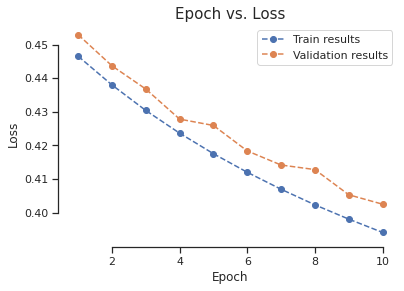 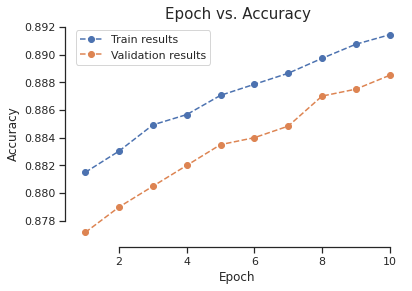

**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

In [468]:
# write a function that calculates the accuracy
def accuracy(correct, total): 
    """
    function to calculate the accuracy given the
        correct: number of correctly classified samples
        total: total number of samples
    returns the ratio
    """
    
    return correct / total

In [469]:
# Refine the training function from above
# it should contain:
# - saving of losses
# - calculation of accuracy
# - returning the mean loss and accuracy


def average(data):
  return sum(data) / len(data)

def evaluate(loader, is_train):
  losses = []
  accuracies = []

  for i, (images, labels) in enumerate(loader):
      images = images.to(device)
      labels = labels.to(device)

      model.train() if is_train else model.eval()

      # Forward pass: get predictions
      if not is_train:
        with torch.no_grad():
          y_pred = model(images)
      else:
        y_pred = model(images)

      # Computing stats
      loss = loss_function(y_pred, labels)
      losses.append(loss.item())

      correct = (y_pred.argmax(dim=-1) == labels).sum().item()
      overall = len(labels)
      accuracies.append(accuracy(correct, overall))

      # Backward pass -> calculate gradients, update weights
      if (is_train):
        # delete the gradients from last training iteration
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

  return (average(losses), average(accuracies))


In [470]:
# Write a validation function that calculates the loss and accuracy on the validation set
# you can also combine it with the training function

#  ↑↑↑

In [471]:
# Write a run_training function that 
# - calls the train and validate functions for each epoch
# - saves the train_losses, val_losses, train_accs, val_accs as arrays for each epoch

def run_training(num_epochs):
  for epoch in range(num_epochs):
    train_loss, train_acc = evaluate(train_dataloader, is_train=True)
    val_loss, val_acc = evaluate(val_dataloader, is_train=False)

    yield (train_loss, train_acc, val_loss, val_acc)

In [472]:
# Call the run_training function and run it for 10 epochs.
num_epochs = 10

stats = list(run_training(num_epochs))
stats

[(0.9744502232538015,
  0.7868100809636651,
  0.8395760357379913,
  0.8123372395833334),
 (0.7718015999590616,
  0.8259145438388625,
  0.7093366583188375,
  0.8339378720238094),
 (0.6715399526871776,
  0.842339306872038,
  0.633555124203364,
  0.8472144717261906),
 (0.6104134024601977,
  0.8533940560821485,
  0.5863336523373922,
  0.8548409598214285),
 (0.5687291688546185,
  0.8597045319905213,
  0.549307598421971,
  0.8621186755952381),
 (0.5381357085083334,
  0.8641464257503949,
  0.5225858353078365,
  0.8657691592261906),
 (0.5145932979775831,
  0.8683143266192733,
  0.5046948368350664,
  0.8693266369047619),
 (0.49570100779217,
  0.8714492002369668,
  0.4895290769636631,
  0.8697916666666666),
 (0.4802261949715456,
  0.8746963862559242,
  0.4736021508773168,
  0.8740931919642857),
 (0.46726105860059297,
  0.8766809834123224,
  0.46033617854118347,
  0.8754417782738094)]

In [473]:
# Write a plot function

def plot(data, value_title):
  ax = sns.lineplot(data=data, markers=['o', 'o'], dashes=False)
  ax.set(title=f'Epoch vs {value_title}', xlabel='Epoch', ylabel=value_title)
  ax.legend(['Train results', 'Validation results'])

  # Setting style
  sns.despine(offset=10, trim=True)
  sns.set_style("ticks")

  plt.show()

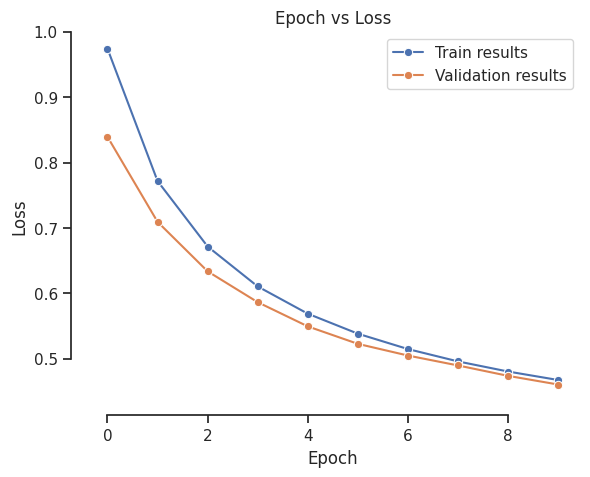

In [480]:
# Plot losses

df = pd.DataFrame(stats)

plot((df[0], df[2]) , 'Loss')

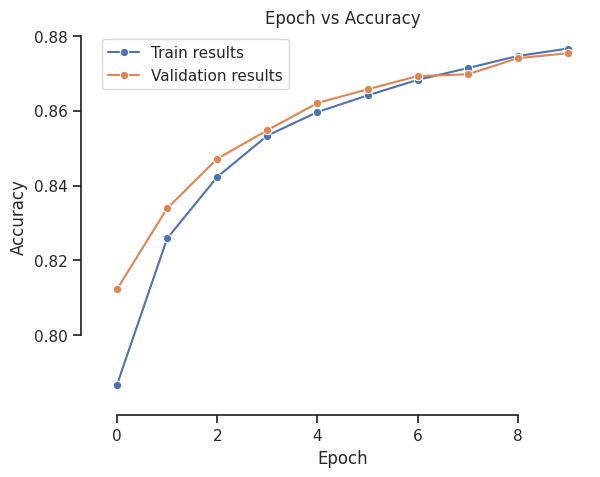

In [481]:
# Plot accuracies

plot((df[1], df[3]), 'Accuracy')

In [476]:
# Comment on the loss and accuracy curves. Do they look as expected? Why/Why not?
# If not, what might be the reason.


# Yes, the chart look as expected. 
# Due to backward propagation, error reduces and accuracy improves over time. 
# Both lines, training and validation, go in the same direction meaning there is no overfitting


### Plot the confusion matrix

Additionally to the losses and accuracies we want to plot the confusion matrix at the end of the training procedure, to get an overview about which digits were easily predicted, and which digits were often confused for other, similar looking digits.

1.   Write a function that calculates the confusion values on the validation set.
2.   Normalize the confusion matrix and plot it using seaborn similar to the following format.

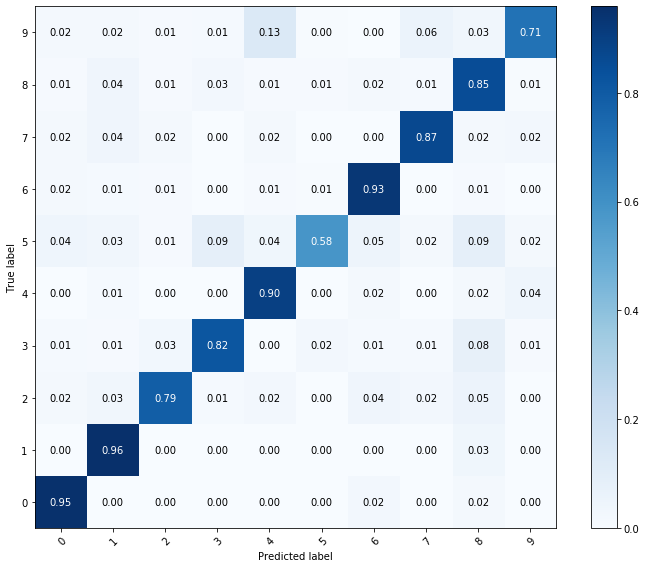

In [477]:
# Write a function to calculate the confusion values

predicted = []
target = []

for images, labels in val_dataloader:
  predictions = model(images.to(device))
  predicted.extend(predictions.argmax(dim=-1).data.cpu().numpy())
  target.extend(labels)

cm = confusion_matrix(target, predicted)

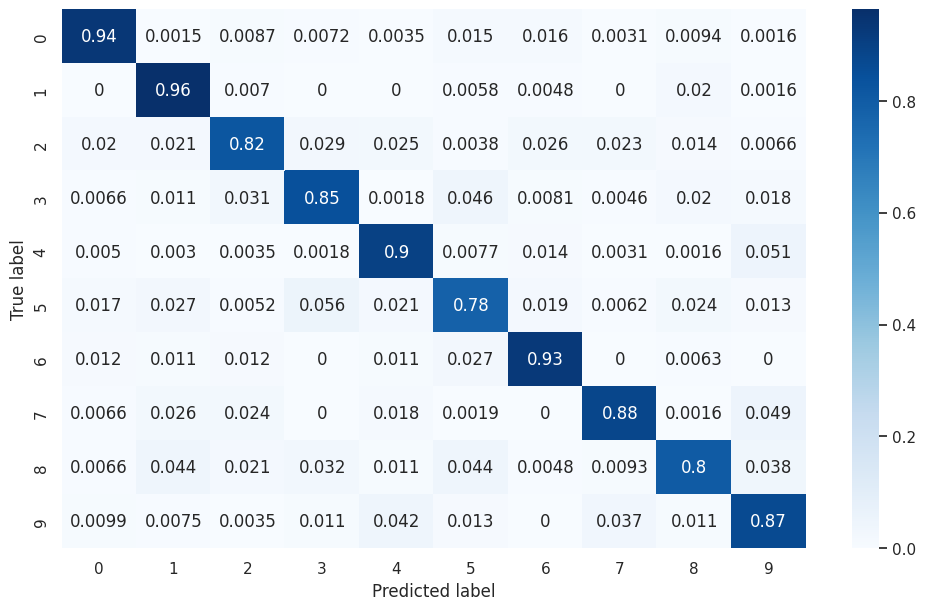

In [478]:
# Normalize and plot the confusion matrix

normalized = cm / cm.sum(axis=1)

plt.figure(figsize = (12,7))
sns.set_theme()
ax = sns.heatmap(normalized, annot=True, cmap='Blues')
ax.set(xlabel='Predicted label', ylabel='True label')
plt.show()

Which digits are often confused with each other?

**TODO your answer here** - 


In [478]:
# Five and three, four and nine, five and eight can often be confused with each other 